# Nome: Henrique Augusto Gomes Togo
# Matrícula: 231111280

## Questão 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Dataset 2D disponível no [Kaggle](https://www.kaggle.com/datasets/samuelcortinhas/2d-clustering-data?resource=download).

São plotados os dados de entrada, apenas para observar a distribuição deles.

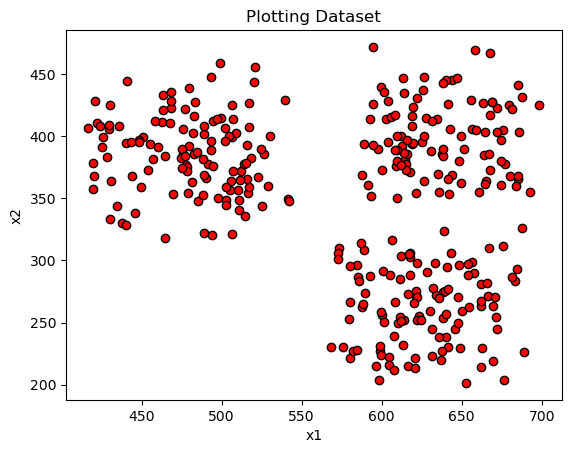

In [2]:
data = np.loadtxt('data_clustering.csv', delimiter=',', dtype=float)
data_label = data[:,2]
data = data[:, 0:2]
plt.title('Plotting Dataset')
plt.plot(data[:,0], data[:,1], 'ro',markeredgecolor=(0,0,0,1))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Nessa etapa, é definida a quantidade de clusters que serão formados. Com o auxílio da biblioteca do scikit-learn, foi utilizada a classe KMeans. O parâmetro inicial (n_clusters) é utilizado para definir a quantidade de clusters. O método fit computa o k-means. Posteriormente o método predict informa o cluster mais próximo para cada amostra dos dados. Em seguida, é composto um array contendo as amostras e na terceira coluna seus respectivos clusters. O método transform gera um array contendo as respectivas distâncias de cada ponto para cada cluster. Por fim, os dados são plotados, com cada amostra na cor do seu respectivo cluster. Para ilustrar o centróide de cada cluster, são plotados quadrados.

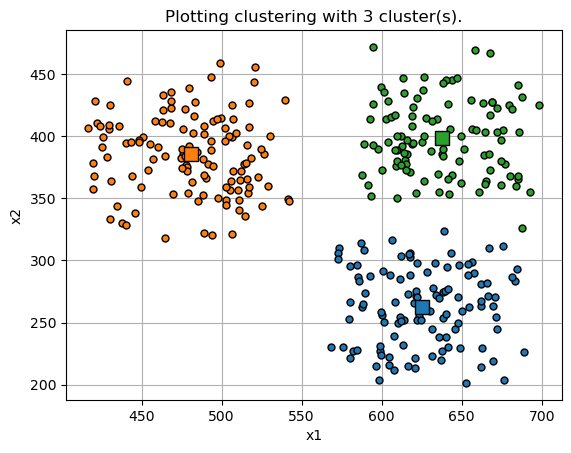

In [3]:
k_clusters = 3
kmeans = KMeans(n_clusters=k_clusters).fit(data)
predict = kmeans.predict(data)
clusters = np.concatenate((data, predict.reshape(-1,1)), axis=1)
distance = kmeans.transform(data)


for i in range(k_clusters):
    plt.plot(clusters[clusters[:,2] == i][:,0], clusters[clusters[:,2] == i][:,1], f'C{i}o', markeredgecolor=(0,0,0,1), markersize=5)
    plt.plot(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], f'C{i}s', markeredgecolor=(0,0,0,1), markersize=10)

plt.title(f'Plotting clustering with {k_clusters} cluster(s).')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()

Nesse caso, foram selecionados 3 clusters. Para chegar a esse número, calculou-se a somatória das distâncias de cada amostra para o seu respectivo centróide. Espera-se que com o aumento de clusters, esse valor também diminua, tendo em vista que, no limite, cada ponto é um cluster individual. Buscou-se observar o momento em que a redução do somatório tem uma queda abrupta. Como evidenciado pelo gráfico, do primeiro ponto para o segundo há uma grande queda. Nesse caso, o segundo ponto corresponde a K = 3. Por isso, escolheu-se três como o número de clusters.

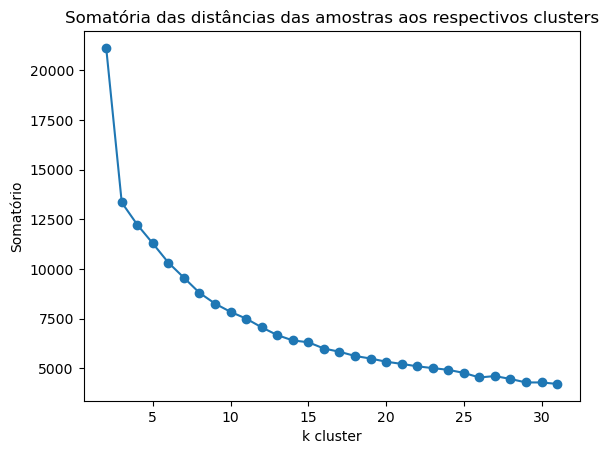

In [4]:
list_error = []
max_clusters = 30
for i in range(2,max_clusters + 2):
    k_clusters = i
    kmeans = KMeans(n_clusters=k_clusters).fit(data)
    predict = kmeans.predict(data)
    clusters = np.concatenate((data, predict.reshape(-1,1)), axis=1)
    distance = kmeans.transform(data)
    total_distance = np.sum(np.min(distance, axis=1))
    list_error.append(total_distance)

plt.plot(range(2,max_clusters + 2), list_error, marker='o')
plt.title('Somatória das distâncias das amostras aos respectivos clusters')
plt.xlabel('k cluster')
plt.ylabel('Somatório')
plt.show()